# <center> Implementação Computacional Teste:
## <center> Penalty-Based Nonlinear Solver for Optimal Reactive Power Dispatch With Discrete Controls
### <center> Edilaine Martins Soler, Eduardo N. Asada, Member, IEEE, and Geraldo R. M. da Costa, Member, IEEE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandapower as pp
from pandapower.networks import case14, case_ieee30, case118, case300, case4gs
from gekko import GEKKO
from pandapower.plotting.plotly import pf_res_plotly
import pandapower.plotting as pplot

# Dados do Sistema IEEE 14

In [2]:
sistema = case14()
pp.runpp(sistema,algorithm='nr', numba = True, init = 'results', tolerance_mva = 1e-6)

In [3]:
sistema.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,768.484773,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,3.532005,None,1,ol,10.783732
1,716.088084,1.0,0,0.0,True,1.0,42.339020,100.0,None,1,9.846967,None,4,ol,40.649040
10,0.000000,1.0,8,0.0,True,1.0,27479.652235,100.0,None,1,0.000014,None,9,ol,0.000037
11,0.000000,1.0,8,0.0,True,1.0,27479.652235,100.0,None,1,0.000055,None,13,ol,0.000117
12,0.000000,1.0,9,0.0,True,1.0,27479.652235,100.0,None,1,0.000035,None,10,ol,0.000083
13,0.000000,1.0,11,0.0,True,1.0,27479.652235,100.0,None,1,0.000096,None,12,ol,0.000086
14,0.000000,1.0,12,0.0,True,1.0,27479.652235,100.0,None,1,0.000074,None,13,ol,0.000151
2,637.493051,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,8.563928,None,2,ol,36.080033
3,494.857619,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.590547,None,3,ol,32.134320
4,503.590401,1.0,1,0.0,True,1.0,42.339020,100.0,None,1,10.379138,None,4,ol,31.689630


In [4]:
sistema.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,135.000,1
1,True,1.06,0.94,2,b,135.000,1
10,True,1.06,0.94,11,b,0.208,1
11,True,1.06,0.94,12,b,0.208,1
12,True,1.06,0.94,13,b,0.208,1
13,True,1.06,0.94,14,b,0.208,1
2,True,1.06,0.94,3,b,135.000,1
3,True,1.06,0.94,4,b,135.000,1
4,True,1.06,0.94,5,b,135.000,1
5,True,1.06,0.94,6,b,0.208,1


In [5]:
sistema.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,1,True,True,None,40.0,1.0,NaN,None,1.045,False,140.0,0.0,50.0,-40.0
1,2,True,True,None,0.0,1.0,NaN,None,1.010,False,100.0,0.0,40.0,0.0
2,5,True,True,None,0.0,1.0,NaN,None,1.070,False,100.0,0.0,24.0,-6.0
3,7,True,True,None,0.0,1.0,NaN,None,1.090,False,100.0,0.0,24.0,-6.0


In [6]:
sistema.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,...,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,3,0.0,True,6,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,2.2,135.0,14.000,2070.288,0.0
1,1.0,3,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,3.1,135.0,0.208,5506.182,0.0
2,1.0,4,0.0,True,5,100.0,None,1,0.0,0.0,...,NaN,False,-1.0,hv,NaN,6.8,135.0,0.208,2494.998,0.0
3,1.0,6,0.0,True,7,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,14.0,12.000,1743.885,0.0
4,1.0,6,0.0,True,8,100.0,None,1,0.0,0.0,...,NaN,False,NaN,None,NaN,NaN,14.0,0.208,1089.099,0.0


# Função para Coleta de Dados e Formulação do Problema pelo IPOPT

In [71]:
def ipm_ieee14(sep14, solver, gamma):
    
    sep = GEKKO(remote=True)

    sep14.res_bus = sep14.res_bus.sort_index()

    Sbase = 100

    ########################################################################### Vetor de tensões das barras

    v = sep14.res_bus['vm_pu'].to_numpy()

    ########################################################################### Vetor de ângulos das barras

    theta = np.radians(sep14.res_bus['va_degree'].to_numpy())

    ########################################################################### Vetor de potência ativa gerada

    pg = np.zeros(len(sep14.bus))

    i = 0

    sep14.gen = sep14.gen.sort_index()

    sep14.res_gen = sep14.res_gen.sort_index()

    for bus in sep14.gen['bus'].to_numpy():

        pg[bus] = sep14.gen['p_mw'].to_numpy()[i]/Sbase

        i = i+1

    pg[0] = sep14.res_ext_grid['p_mw'].to_numpy()/100

    pg_ls = sep14.ext_grid['max_p_mw'].to_numpy()/100

    pg_li = sep14.ext_grid['min_p_mw'].to_numpy()/100


    ########################################################################### Vetor de potência reativa gerada

    qg = np.zeros(len(sep14.bus))

    i = 0

    sep14.gen = sep14.gen.sort_index()

    for bus in sep14.gen['bus'].to_numpy():

        qg[bus] = sep14.res_gen['q_mvar'].to_numpy()[i]/Sbase

        i = i+1

    qg[0] = sep14.res_ext_grid['q_mvar'][0]/Sbase


    ########################################################################### Vetores de limite de potência reativa

    qg_ls = np.zeros(len(sep14.bus))
    qg_li = np.zeros(len(sep14.bus))

    i=0

    for bus in sep14.gen['bus'].to_numpy():

        qg_ls[bus] = sep14.gen['max_q_mvar'].to_numpy()[i]/Sbase
        qg_li[bus] = sep14.gen['min_q_mvar'].to_numpy()[i]/Sbase


        i=i+1

    qg_ls[0] = sep14.ext_grid['max_q_mvar'].to_numpy()/Sbase

    qg_li[0] = sep14.ext_grid['min_q_mvar'].to_numpy()/Sbase


    ########################################################################### Vetor de potência ativa consumida


    pc = np.zeros(len(sep14.bus))

    i = 0

    sep14.load = sep14.load.sort_index()

    for bus in sep14.load['bus'].to_numpy():

        pc[bus] = sep14.load['p_mw'].to_numpy()[i]/Sbase

        i=i+1


    ########################################################################### Vetor de potência reativa consumida

    qc = np.zeros(len(sep14.bus))

    i = 0

    for bus in sep14.load['bus'].to_numpy():

        qc[bus] = sep14.load['q_mvar'].to_numpy()[i]/Sbase

        i=i+1

    ########################################################################### Vetor de MVAR Shunt

    sh = np.zeros(len(sep14.bus))

    i = 0

    sep14.shunt = sep14.shunt.sort_index()

    for bus in sep14.shunt['bus'].to_numpy():

        sh[bus] = sep14.shunt['q_mvar'].to_numpy()[i]/Sbase

        i=i+1


    ########################################################################### Vetores de condutância e susceptância série

    m_z = np.zeros((5,len(sep14.line)))

    gkm = np.zeros(len(sep14.line))

    bkm = np.zeros(len(sep14.line))

    bo = np.zeros(len(sep14.line))

    bd = np.zeros(len(sep14.line))

    sep14.line = sep14.line.sort_index()

    sep14.bus = sep14.bus.sort_index()

    vbus = sep14.bus.vn_kv.to_numpy(dtype=np.float64)

    zbase = np.power(np.multiply(vbus,1000), 2)/(100*1e6)

    m_z[0,:] = sep14.line.from_bus.to_numpy()

    m_z[1,:] = sep14.line.to_bus.to_numpy()

    bsh = 1e-9*(2*np.pi*60*sep14.line.c_nf_per_km.to_numpy())

    m_z[4,:] = bsh


    for i in range(len(sep14.line.index.ravel())):    

        m_z[2,i] = sep14.line.r_ohm_per_km[i]/zbase[int(m_z[0,i])]

        m_z[3,i] = sep14.line.x_ohm_per_km[i]/zbase[int(m_z[0,i])]

        m_z[4,i] =  m_z[4,i] * zbase[int(m_z[0,i])]


    gkm = np.array(np.divide(m_z[2,:], np.power(m_z[2,:],2)+np.power(m_z[3],2)))

    bo = m_z[0,:]

    bd = m_z[1,:]

    ########################################################################### Vetor de susceptância

    bkm = np.array(np.divide(m_z[3,:], np.power(m_z[2,:],2)+np.power(m_z[3],2)))


    ########################################################################### Vetor de susceptância shunt

    bsh = m_z[4,:]

    
    ########################################################################### Vetor de tap

    tap_pos = sep14.trafo[~pd.isnull(sep14.trafo['tap_pos'])]['tap_pos'].to_numpy(dtype=np.float64)

    tap_neutral = sep14.trafo[~pd.isnull(sep14.trafo['tap_neutral'])]['tap_neutral'].to_numpy(dtype=np.float64)

    tap_step_percent = sep14.trafo[~pd.isnull(sep14.trafo['tap_step_percent'])]['tap_step_percent'].to_numpy(dtype=np.float64)

    valor_percentual = (tap_pos-tap_neutral)*(tap_step_percent/100) + 1

    valor_percentual = np.resize(valor_percentual,(len(sep14.trafo)))

    to = sep14.trafo['hv_bus'].to_numpy()


    td = sep14.trafo['lv_bus'].to_numpy()

    i = 0

    for i in range(len(valor_percentual)):

        if i < len(tap_pos):

            valor_percentual[i] = valor_percentual[i]

        else:

            valor_percentual[i] = 1


    tap = valor_percentual

    ########################################################################### Vetores de limite de tap

    tap_max = np.ones(len(tap))*1.05
    tap_min = np.ones(len(tap))*0.95
    sep = GEKKO(remote=True)

    ################################################### TENSÕES

    vmax = 1.06
    vmin = 0.96
    
    
    #################################################### Declaração de Variáveis
    
    
    v0 = 1.05

    ##################################################### Restrições de Desigualdade
    
    v1 = sep.Var(value=v[1],lb=vmin,ub=vmax)


    v2 = sep.Var(value=v[2],lb=vmin,ub=vmax)


    v3 = sep.Var(value=v[3],lb=vmin,ub=vmax)


    v4 = sep.Var(value=v[4],lb=vmin,ub=vmax)


    v5 = sep.Var(value=v[5],lb=vmin,ub=vmax)


    v6 = sep.Var(value=v[6],lb=vmin,ub=vmax)


    v7 = sep.Var(value=v[7],lb=vmin,ub=vmax)


    v8 = sep.Var(value=v[8],lb=vmin,ub=vmax)


    v9 = sep.Var(value=v[9],lb=vmin,ub=vmax)


    v10 = sep.Var(value=v[10],lb=vmin,ub=vmax)


    v11 = sep.Var(value=v[11],lb=vmin,ub=vmax)


    v12 = sep.Var(value=v[12],lb=vmin,ub=vmax)


    v13 = sep.Var(value=v[13],lb=vmin,ub=vmax)



    ################################################## ÂNGULOS


    theta0 = theta[0]

    theta1 = sep.Var(value=theta[1],lb=-np.pi,ub=np.pi)

    theta2 = sep.Var(value=theta[2],lb=-np.pi,ub=np.pi)

    theta3 = sep.Var(value=theta[3],lb=-np.pi,ub=np.pi)

    theta4 = sep.Var(value=theta[4],lb=-np.pi,ub=np.pi)

    theta5 = sep.Var(value=theta[5],lb=-np.pi,ub=np.pi)

    theta6 = sep.Var(value=theta[6],lb=-np.pi,ub=np.pi)

    theta7 = sep.Var(value=theta[7],lb=-np.pi,ub=np.pi)

    theta8 = sep.Var(value=theta[8],lb=-np.pi,ub=np.pi)

    theta9 = sep.Var(value=theta[9],lb=-np.pi,ub=np.pi)

    theta10 = sep.Var(value=theta[10],lb=-np.pi,ub=np.pi)

    theta11 = sep.Var(value=theta[11],lb=-np.pi,ub=np.pi)

    theta12 = sep.Var(value=theta[12],lb=-np.pi,ub=np.pi)

    theta13 = sep.Var(value=theta[13],lb=-np.pi,ub=np.pi)


    ################################################## POTÊNCIA ATIVA BARRA DE REFERÊNCIA


    pg0 = sep.Var(value = pg[0], lb = pg_li[0], ub = pg_ls[0])


    ################################################## POTÊNCIA REATIVA BARRA DE REFERÊNCIA


    qg0 = sep.Var(value = qg[0],lb = qg_li[0],ub = qg_ls[0])


    ################################################## POTÊNCIAS REATIVA GERADA DAS DEMAIS BARRAS

    qg1 = sep.Var(value = qg[1],lb = qg_li[1],ub = qg_ls[1])


    qg2 = sep.Var(value = qg[2],lb = qg_li[2],ub = qg_ls[2])


    qg5 = sep.Var(value = qg[5],lb = qg_li[5],ub = qg_ls[5])


    qg7 = sep.Var(value = qg[7],lb = qg_li[7],ub = qg_ls[7])


    ################################################## POTÊNCIAS REATIVA GERADA DAS DEMAIS BARRAS
    
       
    tap36 = sep.Var(value = tap[0],lb = tap_min[0], ub = tap_max[0])
 
    tap38 = sep.Var(value = tap[1],lb = tap_min[1], ub = tap_max[1])

    tap45 = sep.Var(value = tap[2],lb = tap_min[2], ub = tap_max[2])

    sh8 = sep.Var(value = sh[8],lb = -0.4, ub = 0)                        

    tap67 = 1

    tap68 = 1
        
    ################################################## Bshunt Trafo


    sep14.trafo = sep14.trafo.sort_index()

    barras = sep14.trafo['hv_bus'].to_numpy()

    xkm = (sep14.trafo['vk_percent'].to_numpy()/100)*(1000/sep14.trafo['sn_mva'].to_numpy())

    bkmt = 10/xkm
    


    ################################################## EQUAÇÕES DO FLUXO DE CARGA (POTÊNCIA ATIVA E REATIVA)

    ############################ BARRA 0 - ATIVA

    sep.Equation(

        pg0 - pc[0] - 


        # LINHA 0 - BARRA 0 COM 1

        (gkm[0]*(v0**2) - v0*v1*(gkm[0]*sep.cos(theta0-theta1) - bkm[0]*sep.sin(theta0-theta1)) +  

        # LINHA 1 - BARRA 0 COM 4

         gkm[1]*(v0**2) - v0*v4*(gkm[1]*sep.cos(theta0-theta4)-bkm[1]*sep.sin(theta0-theta4))) ==0


            )


    ############################ BARRA 0 - REATIVA


    sep.Equation(


        qg0 - qc[0] - 

        # LINHA 0 - BARRA 0 COM 1

        ((-(v0**2)*(-bkm[0]+bsh[0]/2)) + v0*v1*(-bkm[0]*sep.cos(theta0-theta1) - gkm[0]*sep.sin(theta0-theta1)) +

        # LINHA 1 - BARRA 0 COM 4


        (-(v0**2)*(-bkm[1]+bsh[1]/2)) + v0*v4*(-bkm[1]*sep.cos(theta0-theta4) - gkm[1]*sep.sin(theta0-theta4))) == 0


            )


    ############################ BARRA 1 - ATIVA

    sep.Equation(

        pg[1] - pc[1] - 

        # LINHA 0 - BARRA 1 COM 0

        (gkm[0]*(v1**2) - v0*v1*(gkm[0]*sep.cos(theta1-theta0) - bkm[0]*sep.sin(theta1-theta0)) +  

        # LINHA 2 - BARRA 1 COM 2

         gkm[2]*(v1**2) - v1*v2*(gkm[2]*sep.cos(theta1-theta2)-bkm[2]*sep.sin(theta1-theta2)) +

         # LINHA 3 - BARRA 1 COM 3

         gkm[3]*(v1**2) - v1*v3*(gkm[3]*sep.cos(theta1-theta3)-bkm[3]*sep.sin(theta1-theta3)) +

         # LINHA 4 - BARRA 1 COM 4

         gkm[4]*(v1**2) - v1*v4*(gkm[4]*sep.cos(theta1-theta4)-bkm[4]*sep.sin(theta1-theta4))) == 0


            )


    ############################ BARRA 1 - REATIVA


    sep.Equation(


        qg1 - qc[1] - 

        # LINHA 0 - BARRA 1 COM 0

        ((-(v1**2)*(-bkm[0]+bsh[0]/2)) + v1*v0*(-bkm[0]*sep.cos(theta1-theta0) - gkm[0]*sep.sin(theta1-theta0)) +

        # LINHA 2 - BARRA 1 COM 2


        (-(v1**2)*(-bkm[2]+bsh[2]/2)) + v1*v2*(-bkm[2]*sep.cos(theta1-theta2) - gkm[2]*sep.sin(theta1-theta2)) +

        # LINHA 3 - BARRA 1 COM 3

        (-(v1**2)*(-bkm[3]+bsh[3]/2)) + v1*v3*(-bkm[3]*sep.cos(theta1-theta3) - gkm[3]*sep.sin(theta1-theta3)) +

        # LINHA 4 - BARRA 1 COM 4

        (-(v1**2)*(-bkm[4]+bsh[4]/2)) + v1*v4*(-bkm[4]*sep.cos(theta1-theta4) - gkm[4]*sep.sin(theta1-theta4)))  == 0

        )


    ############################ BARRA 2 - ATIVA

    sep.Equation(

        pg[2] - pc[2] - 

        # LINHA 2 - BARRA 2 COM 1

        (gkm[2]*(v2**2) - v2*v1*(gkm[2]*sep.cos(theta2-theta1) - bkm[2]*sep.sin(theta2-theta1)) +  

        # LINHA 5 - BARRA 2 COM 3

         gkm[5]*(v2**2) - v2*v3*(gkm[5]*sep.cos(theta2-theta3)-bkm[5]*sep.sin(theta2-theta3))) == 0


            )


    ############################ BARRA 2 - REATIVA


    sep.Equation(


        qg2 - qc[2] - 

        # LINHA 2 - BARRA 2 COM 1

        ((-(v2**2)*(-bkm[2]+bsh[2]/2)) + v2*v1*(-bkm[2]*sep.cos(theta2-theta1) - gkm[2]*sep.sin(theta2-theta1)) +


        # LINHA 5 - BARRA 2 COM 3


        (-(v2**2)*(-bkm[5]+bsh[5]/2)) + v3*v2*(-bkm[5]*sep.cos(theta2-theta3) - gkm[5]*sep.sin(theta2-theta3))) == 0

        )


    ############################ BARRA 3 - ATIVA

    sep.Equation(

        pg[3] - pc[3] - 

        # LINHA 3 - BARRA 3 COM 1

        (gkm[3]*(v3**2) - v3*v1*(gkm[3]*sep.cos(theta3-theta1) - bkm[3]*sep.sin(theta3-theta1)) +  


        # LINHA 5 - BARRA 3 COM 2

        gkm[5]*(v3**2) - v3*v2*(gkm[5]*sep.cos(theta3-theta2) - bkm[5]*sep.sin(theta3-theta2)) +  


        # LINHA 6 - BARRA 3 COM 4

         gkm[6]*(v3**2) - v4*v3*(gkm[6]*sep.cos(theta3-theta4)-bkm[6]*sep.sin(theta3-theta4))+

        # TRAFO 0 - BARRA 3 COM 6

        -(v3*v6/tap36)*-bkmt[0]*sep.sin(theta3-theta6) + 

        # TRAFO 1 - BARRA 3 COM 8

         -(v3*v8/tap38)*-bkmt[1]*sep.sin(theta3-theta8)) == 0

            )



    ############################ BARRA 3 - REATIVA


    sep.Equation(


        qg[3] - qc[3] - 


        # LINHA 3 - BARRA 3 COM 1

        ((-(v3**2)*(-bkm[3]+bsh[3]/2)) + v3*v1*(-bkm[3]*sep.cos(theta3-theta1) - gkm[3]*sep.sin(theta3-theta1)) +


        # LINHA 5 - BARRA 3 COM 2


        (-(v3**2)*(-bkm[5]+bsh[5]/2)) + v3*v2*(-bkm[5]*sep.cos(theta3-theta2) - gkm[5]*sep.sin(theta3-theta2)) +


         # LINHA 6 - BARRA 3 COM 4

        (-(v3**2)*(-bkm[6]+bsh[6]/2)) + v3*v4*(-bkm[6]*sep.cos(theta3-theta4) - gkm[6]*sep.sin(theta3-theta4))+


         # TRAFO 0 - BARRA 3 COM 6

        -(-bkmt[0]/tap36**2)*v3**2 + (v3*v6/tap36)*-bkmt[0]*sep.cos(theta3-theta6)+


         # TRAFO 1 - BARRA 3 COM 8

        -(-bkmt[1]/tap38**2)*v3**2 + (v3*v8/tap38)*-bkmt[1]*sep.cos(theta3-theta8)) == 0

        )


    ############################ BARRA 4 - ATIVA

    sep.Equation(

        pg[4] - pc[4] - 

        # LINHA 1 - BARRA 4 COM 0

        (gkm[1]*(v4**2) - v4*v0*(gkm[1]*sep.cos(theta4-theta0) - bkm[1]*sep.sin(theta4-theta0)) +  


        # LINHA 4 - BARRA 4 COM 1

        gkm[4]*(v4**2) - v4*v1*(gkm[4]*sep.cos(theta4-theta1) - bkm[4]*sep.sin(theta4-theta1)) +  


        # LINHA 6 - BARRA 4 COM 3

         gkm[6]*(v4**2) - v4*v3*(gkm[6]*sep.cos(theta4-theta3)-bkm[6]*sep.sin(theta4-theta3))+

        # TRAFO 2 - BARRA 4 COM 5

        -(v4*v5/tap45)*-bkmt[2]*sep.sin(theta4-theta5)) == 0


            )



    ############################ BARRA 4 - REATIVA


    sep.Equation(


        qg[4] - qc[4] - 


        # LINHA 1 - BARRA 4 COM 0

        ((-(v4**2)*(-bkm[1]+bsh[1]/2)) + v4*v0*(-bkm[1]*sep.cos(theta4-theta0) - gkm[1]*sep.sin(theta4-theta0)) +

        # LINHA 4 - BARRA 4 COM 1

        (-(v4**2)*(-bkm[4]+bsh[4]/2)) + v4*v1*(-bkm[4]*sep.cos(theta4-theta1) - gkm[4]*sep.sin(theta4-theta1)) +

        # LINHA 6 - BARRA 4 COM 3

        (-(v4**2)*(-bkm[6]+bsh[6]/2)) + v3*v4*(-bkm[6]*sep.cos(theta4-theta3) - gkm[6]*sep.sin(theta4 - theta3)) +

        # TRAFO 2 - BARRA 4 COM 5

        -(-bkmt[2]/tap45**2)*v4**2 + (v4*v5/tap45)*-bkmt[2]*sep.cos(theta4-theta5)) == 0


        )


    ############################ BARRA 5 - ATIVA

    sep.Equation(


        pg[5] - pc[5] - 

        # LINHA 7 - BARRA 5 COM 10

        (gkm[7]*(v5**2) - v5*v10*(gkm[7]*sep.cos(theta5-theta10) - bkm[7]*sep.sin(theta5-theta10)) +  


        # LINHA 8 - BARRA 5 COM 11

        gkm[8]*(v5**2) - v5*v11*(gkm[8]*sep.cos(theta5-theta11) - bkm[8]*sep.sin(theta5-theta11)) +  


        # LINHA 9 - BARRA 5 COM 12

         gkm[9]*(v5**2) - v5*v12*(gkm[9]*sep.cos(theta5-theta12)-bkm[9]*sep.sin(theta5-theta12))+

        # TRAFO 2 - BARRA 5 COM 4

        -(v4*v5/tap45)*-bkmt[2]*sep.sin(theta5-theta4)) == 0


            )



    ############################ BARRA 5 - REATIVA


    sep.Equation(


        qg5 - qc[5] - 

        # LINHA 7 - BARRA 5 COM 10

        ((-(v5**2)*(-bkm[7]+bsh[7]/2)) + v5*v10*(-bkm[7]*sep.cos(theta5-theta10) - gkm[7]*sep.sin(theta5-theta10)) +

        # LINHA 8 - BARRA 5 COM 11

        (-(v5**2)*(-bkm[8]+bsh[8]/2)) + v5*v11*(-bkm[8]*sep.cos(theta5-theta11) - gkm[8]*sep.sin(theta5-theta11)) +

        # LINHA 9 - BARRA 5 COM 12

        (-(v5**2)*(-bkm[9]+bsh[9]/2)) + v5*v12*(-bkm[9]*sep.cos(theta5-theta12) - gkm[9]*sep.sin(theta5 - theta12)) +

        # TRAFO 2 - BARRA 4 COM 5

        -(-bkmt[2])*v5**2 + (v4*v5/tap45)*-bkmt[2]*sep.cos(theta5-theta4)) == 0


        )

    ############################ BARRA 6 - ATIVA

    sep.Equation(


        pg[6] - pc[6] - 

        # TRAFO 3 - BARRA 6 COM 7

        (-(v3*v6/tap36)*-bkmt[0]*sep.sin(theta6-theta3) + 

         # TRAFO 3 - BARRA 6 COM 7

        -(v6*v7/1)*-bkmt[3]*sep.sin(theta6-theta7) + 

         # TRAFO 4 - BARRA 6 COM 8

        -(v6*v8/1)*-bkmt[4]*sep.sin(theta6-theta8)) == 0


            )



    ############################ BARRA 6 - REATIVA


    sep.Equation(


        qg[6] - qc[6] - 


        # TRAFO 0 - BARRA 6 COM 3

       (-(-bkmt[0])*v6**2 + (v6*v3/tap36)*-bkmt[0]*sep.cos(theta6-theta3) +

        # TRAFO 3 - BARRA 6 COM 7

       -(-bkmt[3])*v6**2 + (v6*v7/1)*-bkmt[3]*sep.cos(theta6-theta7) +

        # TRAFO 4 - BARRA 6 COM 8

        -(-bkmt[4])*v6**2 + (v6*v8/1)*-bkmt[4]*sep.cos(theta6-theta8)) == 0


        )

    ############################ BARRA 7 - ATIVA

    sep.Equation(

        pg[7] - pc[7] - 


         # TRAFO 3 - BARRA 6 COM 7

        (-(v6*v7/1)*-bkmt[3]*sep.sin(theta7-theta6) ) == 0


            )



    ############################ BARRA 7 - REATIVA


    sep.Equation(


        qg7 - qc[7] - 

        # TRAFO 3 - BARRA 6 COM 7

       (-(-bkmt[3])*v7**2 + (v6*v7/1)*-bkmt[3]*sep.cos(theta7-theta6) ) == 0


        )


    ############################ BARRA 8 - ATIVA

    sep.Equation(


        pg[8] - pc[8] - 


         # TRAFO 1 - BARRA 3 COM 8

        (-(v3*v8/tap38)*-bkmt[1]*sep.sin(theta8-theta3) +


         # TRAFO 4 - BARRA 6 COM 8

        -(v6*v8/1)*-bkmt[4]*sep.sin(theta8-theta6) +

        # Linha 11 - BARRA 8 COM 13

        gkm[11]*(v8**2) - v8*v13*(gkm[11]*sep.cos(theta8-theta13) - bkm[11]*sep.sin(theta8-theta13)) +  

        # Linha 10 - BARRA 8 COM 9

        gkm[10]*(v8**2) - v8*v9*(gkm[10]*sep.cos(theta8-theta9) - bkm[10]*sep.sin(theta8-theta9))) == 0


            )


    ############################ BARRA 8 - REATIVA


    sep.Equation(


       qg[8] - qc[8] - sh8*v8*v8 -

        # TRAFO 1 - BARRA 3 COM 8

       (-(-bkmt[1])*v8**2 + (v3*v8/tap38)*-bkmt[1]*sep.cos(theta8-theta3)+

        # TRAFO 4 - BARRA 6 COM 8

       -(-bkmt[4])*v8**2 + (v6*v8/1)*-bkmt[4]*sep.cos(theta8-theta6) +

        # LINHA 11 - BARRA 8 COM 13

        (-(v8**2)*(-bkm[11]+bsh[11]/2)) + v8*v13*(-bkm[11]*sep.cos(theta8-theta13) - gkm[11]*sep.sin(theta8 - theta13)) +

        # LINHA 10 - BARRA 8 COM 9

        (-(v8**2)*(-bkm[10]+bsh[10]/2)) + v9*v8*(-bkm[10]*sep.cos(theta8-theta9) - gkm[10]*sep.sin(theta8 - theta9))) == 0


        )



    ############################ BARRA 9 - ATIVA

    sep.Equation(


        pg[9] - pc[9] - 


        # Linha 10 - BARRA 8 COM 9

        (gkm[10]*(v9**2) - v8*v9*(gkm[10]*sep.cos(theta9-theta8) - bkm[10]*sep.sin(theta9-theta8)) +  

        # Linha 12 - BARRA 9 COM 10

        gkm[12]*(v9**2) - v10*v9*(gkm[12]*sep.cos(theta9-theta10) - bkm[12]*sep.sin(theta9-theta10))) == 0

    )


    ############################ BARRA 9 - REATIVA


    sep.Equation(


        qg[9] - qc[9] -

         # LINHA 10 - BARRA 8 COM 9

        ((-(v9**2)*(-bkm[10]+bsh[10]/2)) + v8*v9*(-bkm[10]*sep.cos(theta9-theta8) - gkm[10]*sep.sin(theta9 - theta8)) +

        # LINHA 12 - BARRA 9 COM 10

        (-(v9**2)*(-bkm[12]+bsh[12]/2)) + v9*v10*(-bkm[12]*sep.cos(theta9-theta10) - gkm[12]*sep.sin(theta9 - theta10))) == 0


        )


    ############################ BARRA 10 - ATIVA

    sep.Equation(


        pg[10] - pc[10] - 


        # Linha 7 - BARRA 5 COM 10

        (gkm[7]*(v10**2) - v5*v10*(gkm[7]*sep.cos(theta10-theta5) - bkm[7]*sep.sin(theta10-theta5)) +  

        # Linha 12 - BARRA 9 COM 10

        gkm[12]*(v10**2) - v10*v9*(gkm[12]*sep.cos(theta10-theta9) - bkm[12]*sep.sin(theta10-theta9))) == 0

    )


    ############################ BARRA 10 - REATIVA


    sep.Equation(


        qg[10] - qc[10] -

        # Linha 7 - BARRA 5 COM 10

        ((-(v10**2)*(-bkm[7]+bsh[7]/2)) + v5*v10*(-bkm[7]*sep.cos(theta10-theta5) - gkm[7]*sep.sin(theta10 - theta5)) +

        # Linha 12 - BARRA 9 COM 10

        (-(v10**2)*(-bkm[12]+bsh[12]/2)) + v9*v10*(-bkm[12]*sep.cos(theta10-theta9) - gkm[12]*sep.sin(theta10 - theta9))) == 0


        )




    ############################ BARRA 11 - ATIVA

    sep.Equation(


        pg[11] - pc[11] - 


        # Linha 8 - BARRA 5 COM 11

        (gkm[8]*(v11**2) - v5*v11*(gkm[8]*sep.cos(theta11-theta5) - bkm[8]*sep.sin(theta11-theta5)) +  

        # Linha 13 - BARRA 11 COM 12

        gkm[13]*(v11**2) - v11*v12*(gkm[13]*sep.cos(theta11-theta12) - bkm[13]*sep.sin(theta11-theta12))) == 0

    )


    ############################ BARRA 11 - REATIVA


    sep.Equation(


        qg[11] - qc[11] -

        # Linha 8 - BARRA 5 COM 11

        ((-(v11**2)*(-bkm[8]+bsh[8]/2)) + v11*v5*(-bkm[8]*sep.cos(theta11-theta5) - gkm[8]*sep.sin(theta11 - theta5)) +

        # Linha 13 - BARRA 11 COM 12

        (-(v11**2)*(-bkm[13]+bsh[13]/2)) + v11*v12*(-bkm[13]*sep.cos(theta11-theta12) - gkm[13]*sep.sin(theta11 - theta12))) == 0


        )

    ############################ BARRA 12 - ATIVA

    sep.Equation(


        pg[12] - pc[12] - 


        # Linha 9 - BARRA 5 COM 12

        (gkm[9]*(v12**2) - v5*v12*(gkm[9]*sep.cos(theta12-theta5) - bkm[9]*sep.sin(theta12-theta5)) +  

        # Linha 13 - BARRA 11 COM 12

         gkm[13]*(v12**2) - v12*v11*(gkm[13]*sep.cos(theta12-theta11) - bkm[13]*sep.sin(theta12-theta11)) +  

        # Linha 14 - BARRA 12 COM 13

        gkm[14]*(v12**2) - v12*v13*(gkm[14]*sep.cos(theta12-theta13) - bkm[14]*sep.sin(theta12-theta13))) == 0

    )


    ############################ BARRA 12 - REATIVA


    sep.Equation(


        qg[12] - qc[12] -


        # Linha 9 - BARRA 5 COM 12

        ((-(v12**2)*(-bkm[9]+bsh[9]/2)) + v12*v5*(-bkm[9]*sep.cos(theta12-theta5) - gkm[9]*sep.sin(theta12 - theta5)) +

        # Linha 13 - BARRA 11 COM 12

        (-(v12**2)*(-bkm[13]+bsh[13]/2)) + v11*v12*(-bkm[13]*sep.cos(theta12-theta11) - gkm[13]*sep.sin(theta12 - theta11)) +

        # Linha 14 - BARRA 12 COM 13

        (-(v12**2)*(-bkm[14]+bsh[14]/2)) + v13*v12*(-bkm[14]*sep.cos(theta12-theta13) - gkm[14]*sep.sin(theta12 - theta13))) == 0 )



    ############################ BARRA 13 - ATIVA

    sep.Equation(


        pg[13] - pc[13] - 


        # Linha 11 - BARRA 8 COM 13

        (gkm[11]*(v13**2) - v8*v13*(gkm[11]*sep.cos(theta13-theta8) - bkm[11]*sep.sin(theta13-theta8)) +  

        # Linha 14 - BARRA 12 COM 13

        gkm[14]*(v13**2) - v12*v13*(gkm[14]*sep.cos(theta13-theta12) - bkm[14]*sep.sin(theta13-theta12))) == 0

    )


    ############################ BARRA 13 - REATIVA


    sep.Equation(


        qg[13] - qc[13] -

          # Linha 11 - BARRA 8 COM 13

        ((-(v13**2)*(-bkm[11]+bsh[11]/2)) + v8*v13*(-bkm[11]*sep.cos(theta13-theta8) - gkm[11]*sep.sin(theta13 - theta8)) +

        # Linha 14 - BARRA 12 COM 13

        (-(v13**2)*(-bkm[14]+bsh[14]/2)) + v13*v12*(-bkm[14]*sep.cos(theta13-theta12) - gkm[14]*sep.sin(theta13 - theta12))) == 0

    )
    
    
    ################################################## FUNÇÃO OBJETIVO (PERDAS DE POTÊNCIA ATIVA)       

               
        
    sep.Obj( 




        # 0 -> LINHA BARRA 0 - BARRA 1

        gkm[0]*((v0**2) + (v1**2) - 2*v0*v1*sep.cos(0-theta1)) +

        # 1 -> LINHA BARRA 0 - BARRA 4


        gkm[1]*((v0**2) + (v4**2) - 2*v0*v4*sep.cos(0-theta4)) +  


        # 2 -> LINHA BARRA 1 - BARRA 2


        gkm[2]*((v1**2) + (v2**2) - 2*v1*v2*sep.cos(theta1 - theta2)) + 


        # 3 -> LINHA BARRA 1 - BARRA 3


        gkm[3]*((v1**2) + (v3**2) - 2*v1*v3*sep.cos(theta1 - theta3)) + 


        # 4 -> LINHA BARRA 1 - BARRA 4


        gkm[4]*((v1**2) + (v4**2) - 2*v1*v4*sep.cos(theta1 - theta4)) + 


        # 5 -> LINHA BARRA 2 - BARRA 3


        gkm[5]*((v2**2) + (v3**2) - 2*v2*v3*sep.cos(theta2 - theta3)) + 

        # 6 -> LINHA BARRA 3 - BARRA 4


        gkm[6]*((v3**2) + (v4**2) - 2*v4*v3*sep.cos(theta3 - theta4)) + 

        # 7 -> LINHA BARRA 5 - BARRA 10


        gkm[7]*((v5**2) + (v10**2) - 2*v5*v10*sep.cos(theta5 - theta10)) + 

        # 8 -> LINHA BARRA 5 - BARRA 11


        gkm[8]*((v5**2) + (v11**2) - 2*v5*v11*sep.cos(theta5 - theta11)) + 

        # 9 -> LINHA BARRA 5 - BARRA 12


        gkm[9]*((v5**2) + (v12**2) - 2*v5*v12*sep.cos(theta5 - theta12)) + 


        # 10 -> LINHA BARRA 8 - BARRA 9


        gkm[10]*((v8**2) + (v9**2) - 2*v8*v9*sep.cos(theta8 - theta9)) + 

        # 11 -> LINHA BARRA 8 - BARRA 13


        gkm[11]*((v8**2) + (v13**2) - 2*v8*v13*sep.cos(theta8 - theta13)) + 

        # 12 -> LINHA BARRA 9 - BARRA 10


        gkm[12]*((v9**2) + (v10**2) - 2*v9*v10*sep.cos(theta9 - theta10)) + 


        # 13 -> LINHA BARRA 11 - BARRA 12


        gkm[13]*((v12**2) + (v11**2) - 2*v11*v12*sep.cos(theta11 - theta12)) + 



        # 14 -> LINHA BARRA 12 - BARRA 13


        gkm[14]*((v12**2) + (v13**2) - 2*v13*v12*sep.cos(theta12 - theta13)) +
        
        # Penalizações
         
        gamma*(sep.sin(tap36*np.pi/0.1)**2 + sep.sin(tap38*np.pi/0.1)**2 + sep.sin(tap45*np.pi/0.1)**2 + sep.sin(sh8*np.pi/0.2)**2)

        )
            
    sep.options.SOLVER = solver
    
    sep.solve(disp=False)
      
    solution = np.abs(np.array([v1.value[0], v2.value[0], v5.value[0], v7.value[0], tap36.value[0], tap38.value[0], tap45.value[0], sh8.value[0]]))

    return np.abs(solution), sep.options.OBJFCNVAL





# Aplicação do Algoritmo no Sistema IEEE 14

In [77]:
c = 4
gamma_inicial = 1e-5
tol = 5e-6
f_objetivo = []
erros = []
gammas = []
erro = 1

tap36 = []
tap38 = []
tap45 = []
sh8 = []

taps = np.array([0.95, 0.96, 0.97, 0.98, 0.99, 1.00, 1.01, 1.02, 1.03, 1.04, 1.05])
bsh = np.array([0.4, 0.2, 0])

while(erro>tol):
    
    dif = []
    
    solucao, f_obj = ipm_ieee14(sistema, 3, gamma_inicial)
    
    tap36.append(solucao[-4:][0])
    tap38.append(solucao[-4:][1])
    tap45.append(solucao[-4:][2])
    sh8.append(solucao[-4:][3])
    
    for i in range(4):
        
        if i != 3:

            tap = min(abs(taps-solucao[-4:][i]))
            dif.append(tap)

        if i == 3:
            
            sh = min(abs(bsh-solucao[-4:][i]))
            dif.append(sh)
    
    erro = max(dif)
    
    gamma = gamma_inicial
    
    if erro>tol:
    
        gamma_inicial = gamma_inicial*c
        
    if erro<tol:
    
        print('Solução Final:\n')
        
    erros.append(erro)
    gammas.append(gamma)
    f_objetivo.append(100*f_obj)
    
    print('Solução:', solucao)
    print('Perdas: ', 100*f_obj)
    print('Erro: ', erro)
    print('Gamma: ', gamma)
    print('__________________\n')
    

Solução: [1.02543915 0.99506109 1.05999936 1.03895959 0.95440304 0.99858837
 0.9612988  0.39518854]
Perdas:  13.675965999
Erro:  0.004811461380000048
Gamma:  1e-05
__________________

Solução: [1.02540726 0.99510524 1.05999983 1.03801512 0.95684385 0.99690065
 0.96132899 0.39842474]
Perdas:  13.681525256999999
Erro:  0.0031561479099999623
Gamma:  4e-05
__________________

Solução: [1.02519925 0.99549348 1.05999996 1.03714094 0.97339526 0.99099285
 0.96027164 0.39999607]
Perdas:  13.702273166000001
Erro:  0.003395263250000058
Gamma:  0.00016
__________________

Solução: [1.02523344 0.99542773 1.03024639 1.01442725 0.99861552 0.99920918
 0.99134241 0.3995168 ]
Perdas:  13.716602653
Erro:  0.001384484060000024
Gamma:  0.00064
__________________

Solução: [1.0252668  0.99537346 1.02508819 1.01078083 0.99992393 0.99995648
 0.99750845 0.39941313]
Perdas:  13.720672989999999
Erro:  0.002491553409999958
Gamma:  0.00256
__________________

Solução: [1.02527882 0.99535402 1.02362893 1.00968779 1

Text(0.5, 1.0, 'Valor da Função Objetivo Otimizada')

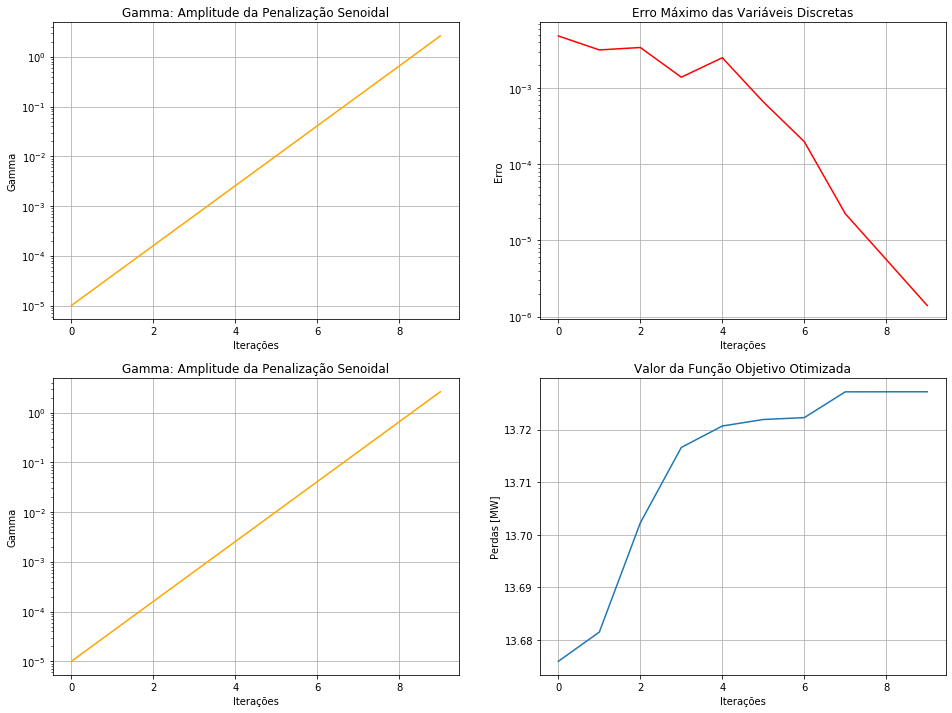

In [78]:
plt.figure(figsize=(16,12))

plt.subplot(222)
plt.plot(erros,color='r')
plt.yscale('log')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Erro')
plt.title('Erro Máximo das Variáveis Discretas')
plt.subplot(221)
plt.plot(gammas,color='orange')
plt.yscale('log')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Gamma')
plt.title('Gamma: Amplitude da Penalização Senoidal')
plt.subplot(223)
plt.plot(gammas,color='orange')
plt.yscale('log')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Gamma')
plt.title('Gamma: Amplitude da Penalização Senoidal')
plt.subplot(224)
plt.plot(f_objetivo)
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Perdas [MW]')
plt.title('Valor da Função Objetivo Otimizada')

### A partir das informações coletadas a cada iteração do algoritmo, pode-se notar que:
    
#### - A medida que o parâmetro gamma é incrementado, observa-se que o erro referente ao desvio do valor das variáveis discretas tende a diminuir, uma vez que o algoritmo torna-se mais rigoroso na penalização da função objetivo.

#### - A medida que o parâmetro gamma é incrementado, o valor ótimo encontrado pelo método de pontos interiores com filtro tende a ser degradado, pois o algoritmo é forçado a procurar novas soluções que atendam a factibilidade das variáveis discretas.

#### - Para um valor de gamma pequeno, temos um problema praticamente relaxado.

Text(0.5, 1.0, 'Potência Reativa Shunt - Barra 8')

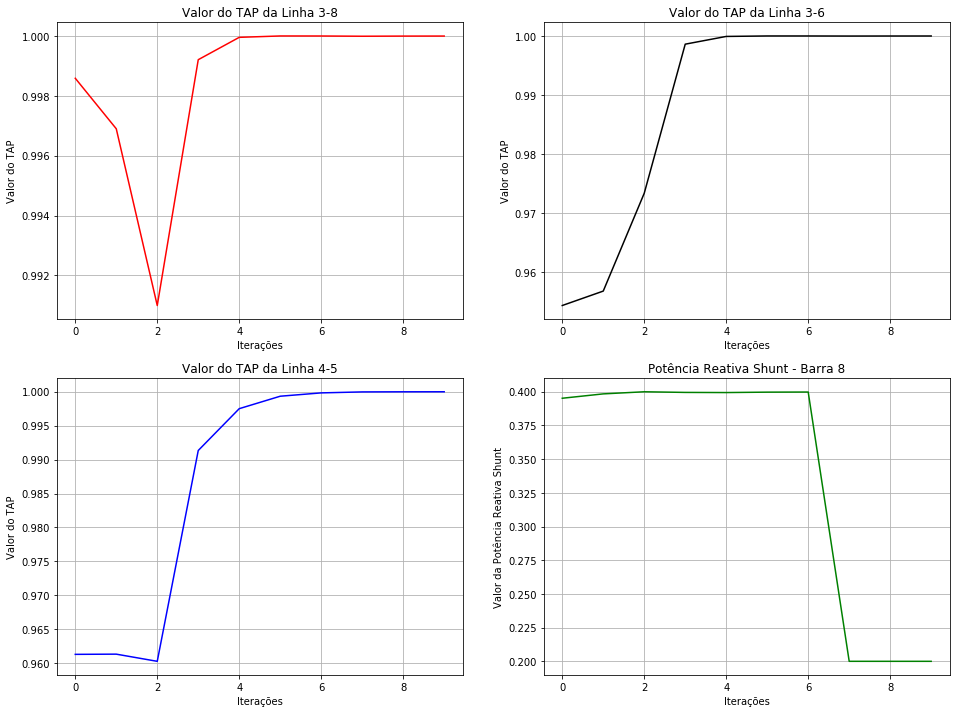

In [79]:
plt.figure(figsize=(16,12))

plt.subplot(221)
plt.plot(tap38,color='r')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Valor do TAP')
plt.title('Valor do TAP da Linha 3-8')
plt.subplot(222)
plt.plot(tap36,color='black')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Valor do TAP')
plt.title('Valor do TAP da Linha 3-6')
plt.subplot(223)
plt.plot(tap45,color='blue')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Valor do TAP')
plt.title('Valor do TAP da Linha 4-5')
plt.subplot(224)
plt.plot(sh8,color='green')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Valor da Potência Reativa Shunt')
plt.title('Potência Reativa Shunt - Barra 8')